In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error
import math

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [2]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [3]:
r2_data = pd.read_csv("../../manual/cleaned_r2.csv")
r2_data.rename(columns={r2_data.columns[0]: 'timestamp'}, inplace=True)
r2_data['day'] = 2
r2_data['ORCHIDS'] = (r2_data['bidPrice'] + r2_data['askPrice']) / 2
r2_data['timestamp'] *= 100
r2_data

,timestamp,bidPrice,askPrice,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,ORCHIDS
0,0,1055.0,1057.0,1.0,8.0,-2.0,1100.0000,75.000000,2,1056.00
1,100,1054.0,1055.5,1.0,8.0,-2.0,1100.8351,75.024070,2,1054.75
2,200,1054.0,1055.5,1.0,8.0,-2.0,1101.6697,75.048004,2,1054.75
3,300,1054.5,1056.0,1.0,8.0,-2.0,1102.5039,75.071810,2,1055.25
4,400,1055.5,1057.0,1.0,8.0,-2.0,1103.3376,75.095474,2,1056.25
...,...,...,...,...,...,...,...,...,...,...
9995,999500,1051.0,1053.0,0.8,8.0,-4.0,2597.2483,69.917725,2,1052.00
9996,999600,1050.5,1051.5,0.8,8.0,-4.0,2597.7950,69.934050,2,1051.00
9997,999700,1051.0,1052.5,0.8,8.0,-4.0,2598.3435,69.950450,2,1051.75
9998,999800,1052.0,1053.0,0.8,8.0,-4.0,2598.8938,69.966900,2,1052.50


In [4]:
prices_neg1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1, r2_data], ignore_index=True)
orchids = orchids.drop(columns=['bidPrice', 'askPrice'])
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids.loc[30003:, 'new_timestamp'] += 1000100
orchids.iloc[0:30005]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.00000,3000200
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.00000,3000300


In [5]:
orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (25*7/12 - np.minimum(orchids['alt_cum_sun'], 25*7/12)) * 12 / 7 # yes
orchids['alt_remain_sun_exp'] = np.exp(orchids['alt_remain_sun']) / 100
orchids['sun_roll'] = orchids['SUNLIGHT'].rolling(window=round(10000*7/12), min_periods = 1).mean()

orchids['sun_change'] = orchids['SUNLIGHT'].pct_change() * 10000 # yes
orchids['sun_diff'] = orchids['SUNLIGHT'].diff() * 100 # yes

orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good

orchids['hum_exp'] = np.exp(orchids['abs_hum_dist'])
orchids['alt_hum_exp'] = np.exp(orchids['alt_hum_dist'])
                                     
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int) # indicator
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int) # indicator

orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 1000000
orchids['hum_diff'] = orchids['HUMIDITY'].diff() * 10000 # yes
orchids['abs_hum_dist_diff'] = orchids['abs_hum_dist'].diff()

orchids['hl_hum_ind'] = ((orchids['abs_hum_dist_diff'] < 0)).astype(int) * orchids['high_low_humidity']
orchids['hl_hum_ind_v2'] = np.sign(orchids['abs_hum_dist_diff']) * orchids['high_low_humidity']



orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_avg_dist'] = orchids['hum_avg'] - 70
orchids['abs_hum_avg_dist'] = orchids['hum_avg_dist'].abs()

orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# orchids['hum_diff_hl'] = 

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000

orchids['hum_dist_change_tte'] = orchids['tte'] * orchids['hum_change'] * orchids['abs_hum_dist']
orchids['sun_hum'] = orchids['hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['abs_sun_hum'] = orchids['abs_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['alt_sun_hum'] = orchids['alt_hum_dist'] * orchids['SUNLIGHT'] / 100

orchids['orchid_diff'] = orchids['ORCHIDS'].diff()
orchids['orchid_roll_day'] = orchids['ORCHIDS'].rolling(window=25, min_periods=1).mean()
orchids['orchid_roll_shift'] = orchids.groupby('day')['orchid_roll_day'].shift(-25)
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-399)
orchids['pnl'] = orchids['orchid_roll_shift'] - orchids['ORCHIDS']

# orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
# orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

# Make sure to use the below features when actually trading

# features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'tte']
features_mid_hum = ['alt_cum_sun', 'alt_remain_sun', 'sun_change', 'sun_diff', 'abs_hum_dist',
                        'hum_change', 'hum_diff', 'hum_avg', 
                        'alt_hum_dist', 'abs_roll_hum_avg_dist', 
                       'SUNLIGHT', 'EXPORT_TARIFF', 'IMPORT_TARIFF'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY'
features_hl_hum = ['alt_remain_sun', 'sun_diff', 
                        'hum_diff', 'hl_hum_ind_v2', 
                        'alt_hum_dist', 
                       'SUNLIGHT', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY'

orchids#[orchids['hl_hum_ind_v2']==0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,0,25.000000,0.002500,24.995714,7.169697e+08,2500.000000,NaN,NaN,9.000000,9.000000,0.0,8103.083928,1.0,0,1,NaN,NaN,NaN,0,NaN,79.000000,9.000000,9.000000,79.000000,9.000000,9.000000,100.000,NaN,225.000000,225.000000,0.0,NaN,1200.000000,1200.28,1201.00,0.28
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.000000,0.002500,24.995714,7.169697e+08,2499.709850,-2.321200,-58.03,9.004100,9.004100,0.0,8136.374771,1.0,0,1,51.898734,41.00,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1200.875000,1200.06,1202.25,-1.69
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.000000,0.002500,24.995714,7.169697e+08,2499.421800,-2.296533,-57.40,9.008210,9.008210,0.0,8169.884086,1.0,0,1,52.022617,41.10,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1201.166667,1199.84,1203.25,-1.91
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.000000,0.002500,24.995714,7.169697e+08,2499.135850,-2.271849,-56.77,9.012340,9.012340,0.0,8203.695480,1.0,0,1,52.273049,41.30,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1201.312500,1199.66,1205.25,-2.09
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.000000,0.002500,24.995714,7.169697e+08,2498.852000,-2.247148,-56.14,9.016490,9.016490,0.0,8237.811558,1.0,0,1,52.523441,41.50,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1201.400000,1199.44,1203.25,-2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,2,999500,1052.00,0.8,8.0,-4.0,2597.2483,69.917725,3999800,25.972483,9.656645,8.445751,4.655250e+01,1523.395503,2.098430,54.49,-0.082275,0.082275,0.0,1.085754,1.0,0,1,232.684696,162.65,-0.016265,0,-0.0,82.195822,12.195822,12.195822,69.404985,-0.595015,0.595015,90.005,1723.067727,-2.136886,2.136886,0.0,0.25,1054.290000,NaN,NaN,NaN
39999,2,999600,1051.00,0.8,8.0,-4.0,2597.7950,69.934050,3999900,25.977950,9.659243,8.441298,4.634565e+01,1523.591291,2.104920,54.67,-0.065950,0.065950,0.0,1.068173,1.0,0,1,233.488718,163.25,-0.016325,0,-0.0,82.194595,12.194595,12.194595,69.419192,-0.580808,0.580808,90.004,1385.933882,-1.713246,1.713246,0.0,-1.00,1054.180000,NaN,NaN,NaN
40000,2,999700,1051.75,0.8,8.0,-4.0,2598.3435,69.950450,4000000,25.983435,9.661841,8.436843,4.613967e+01,1523.787269,2.111406,54.85,-0.049550,0.049550,0.0,1.050798,1.0,0,1,234.506653,164.00,-0.016400,0,-0.0,82.193370,12.193370,12.193370,69.433459,-0.566541,0.566541,90.003,1045.817279,-1.287479,1.287479,0.0,0.75,1054.150000,NaN,NaN,NaN
40001,2,999800,1052.50,0.8,8.0,-4.0,2598.8938,69.966900,4000100,25.988938,9.664440,8.432388,4.593456e+01,1523.983439,2.117888,55.03,-0.033100,0.033100,0.0,1.033654,1.0,0,1,235.166464,164.50,-0.016450,0,-0.0,82.192148,12.192148,12.192148,69.447787,-0.552213,0.552213,90.002,700.576465,-0.860234,0.860234,0.0,0.75,1054.070000,NaN,NaN,NaN


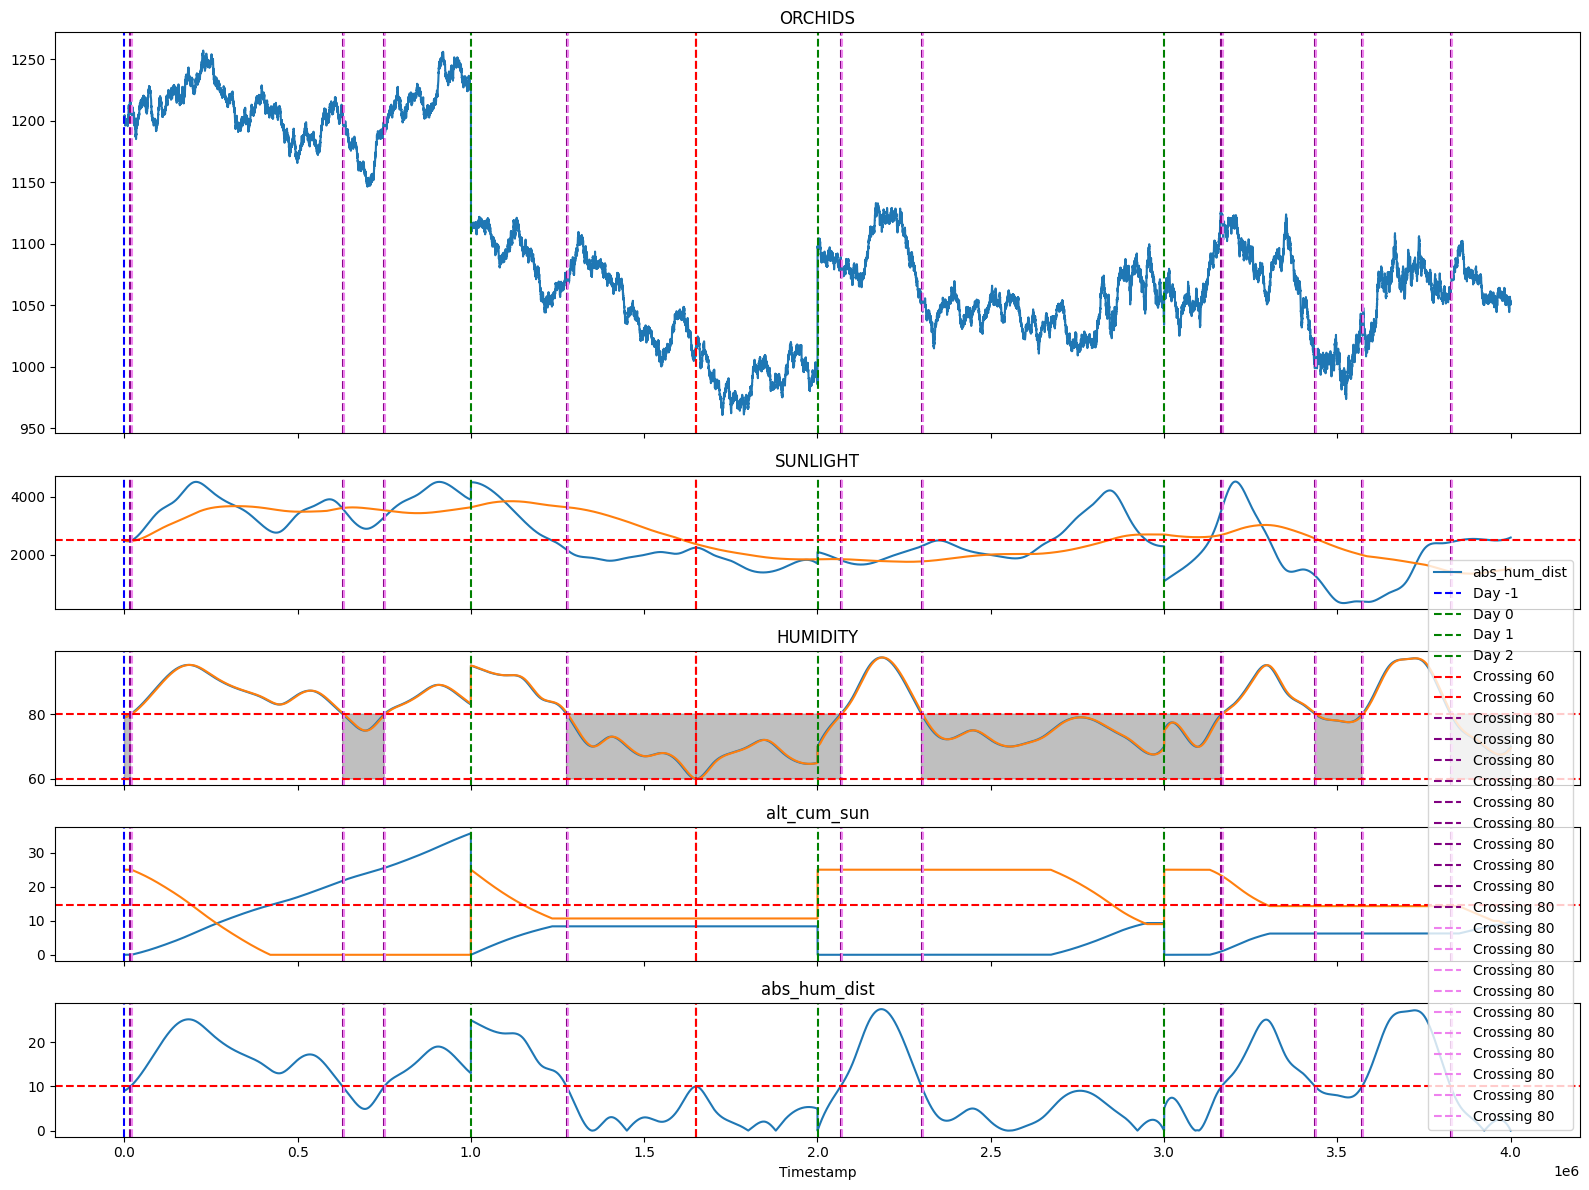

In [6]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    # axs[0].plot(df['new_timestamp'], df['orchid_roll_day'], label='roll')
    # axs[0].plot(df['new_timestamp'], df['orchid_roll_shift'], label='roll_shift')
    # axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [7]:
# target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
# target_humidity_df.head(50)

In [8]:
orchids_cleaned = orchids[(orchids['abs_hum_dist'] <= 10)].dropna().copy() #  & (orchids['SUNLIGHT'] < 2500)  & (orchids['day'] <= 1)
X = orchids_cleaned[features_mid_hum].copy()
y = orchids_cleaned['ORCHIDS']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,0.0,0.002500,24.995714,7.169697e+08,2499.709850,-2.321200,-58.03,9.00410,9.00410,0.0,8136.374771,1.0,0,1,51.898734,41.0,0.00410,0,0.0,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1200.875000,1200.06,1202.25,-1.69
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,0.0,0.002500,24.995714,7.169697e+08,2499.421800,-2.296533,-57.40,9.00821,9.00821,0.0,8169.884086,1.0,0,1,52.022617,41.1,0.00411,0,0.0,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1201.166667,1199.84,1203.25,-1.91
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,0.0,0.002500,24.995714,7.169697e+08,2499.135850,-2.271849,-56.77,9.01234,9.01234,0.0,8203.695480,1.0,0,1,52.273049,41.3,0.00413,0,0.0,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1201.312500,1199.66,1205.25,-2.09
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,0.0,0.002500,24.995714,7.169697e+08,2498.852000,-2.247148,-56.14,9.01649,9.01649,0.0,8237.811558,1.0,0,1,52.523441,41.5,0.00415,0,0.0,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1201.400000,1199.44,1203.25,-2.31
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.02066,500,0.0,0.002500,24.995714,7.169697e+08,2498.570233,-2.222830,-55.52,9.02066,9.02066,0.0,8272.234955,1.0,0,1,52.773794,41.7,0.00417,0,0.0,79.010300,9.010300,9.010300,79.010300,9.010300,9.010300,99.995,47603.065376,225.260440,225.260440,0.0,-1.50,1201.208333,1199.30,1204.25,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39599,2,959600,1047.75,0.8,8.0,-4.0,2498.0925,67.61284,3959900,0.0,8.769541,9.966500,2.130081e+02,1451.432307,0.064450,1.61,-2.38716,2.38716,0.0,10.882544,1.0,0,1,-39.192203,-26.5,0.00265,0,0.0,82.780256,12.780256,12.780256,67.727990,-2.272010,2.272010,90.404,-8458.022762,-59.633465,59.633465,0.0,1.25,1049.010000,1052.23,1052.00,4.48
39600,2,959700,1048.50,0.8,8.0,-4.0,2498.1094,67.61022,3960000,0.0,8.769541,9.966500,2.130081e+02,1451.614419,0.067652,1.69,-2.38978,2.38978,0.0,10.911093,1.0,0,1,-38.750036,-26.2,0.00262,0,0.0,82.778675,12.778675,12.778675,67.724340,-2.275660,2.275660,90.403,-8371.684980,-59.699319,59.699319,0.0,0.75,1048.800000,1052.70,1051.00,4.20
39601,2,959800,1048.75,0.8,8.0,-4.0,2498.1272,67.60763,3960100,0.0,8.769541,9.966500,2.130081e+02,1451.796485,0.071254,1.78,-2.39237,2.39237,0.0,10.939390,1.0,0,1,-38.307818,-25.9,0.00259,0,0.0,82.777095,12.777095,12.777095,67.720719,-2.279281,2.279281,90.402,-8285.024583,-59.764446,59.764446,0.0,0.25,1048.690000,1053.16,1051.75,4.41
39602,2,959900,1048.75,0.8,8.0,-4.0,2498.1458,67.60507,3960200,0.0,8.769541,9.966500,2.130081e+02,1451.978506,0.074456,1.86,-2.39493,2.39493,0.0,10.967430,1.0,0,1,-37.865549,-25.6,0.00256,0,0.0,82.775514,12.775514,12.775514,67.717127,-2.282873,2.282873,90.401,-8198.045270,-59.828843,59.828843,0.0,0.00,1048.540000,1053.60,1052.50,4.85


In [9]:
X_train_scaled = X[orchids_cleaned['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X[orchids_cleaned['day'] > 1]# X_test # scaler.transform(X_test) # 
y_train = y[orchids_cleaned['day'] <= 1]
y_test = y[orchids_cleaned['day'] > 1]
y_test

30003    1056.00
30004    1054.75
30005    1054.75
30006    1055.25
30007    1056.25
          ...   
39599    1047.75
39600    1048.50
39601    1048.75
39602    1048.75
39603    1050.50
Name: ORCHIDS, Length: 4345, dtype: float64

In [10]:
%%time

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=39)

# Initialize the Linear Regression model
lin_reg = LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
lin_pred = lin_reg.predict(X_test_scaled)

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=39)

# Train the model
forest_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
forest_pred = forest_reg.predict(X_test_scaled)

CPU times: total: 20 s
Wall time: 20 s


In [11]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

feature_names = X_train_scaled.columns
coefficients = lin_reg.coef_

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: -85.45339156571872
Linear Regression MSE: 94000.53492063892
Linear Regression MAE: 53.80437023180812
alt_cum_sun: 11.723819952046544
alt_remain_sun: 9.248571235265333
sun_change: 9.239822707908298
sun_diff: -0.5555634357793138
abs_hum_dist: 45.187317103427056
hum_change: -0.15507911806445396
hum_diff: 0.2492239760764665
hum_avg: 4.199038138207197
alt_hum_dist: 4.756195437494171e-13
abs_roll_hum_avg_dist: -43.3461255723277
SUNLIGHT: 0.015391507259217008
EXPORT_TARIFF: 6.683176879887375
IMPORT_TARIFF: 6.075573763445991
Intercept: 411.37116156760146
Random Forest R2: -0.870252184336433
Random Forest MSE: 2033.5200572261847
Random Forest MAE: 36.15276652103776


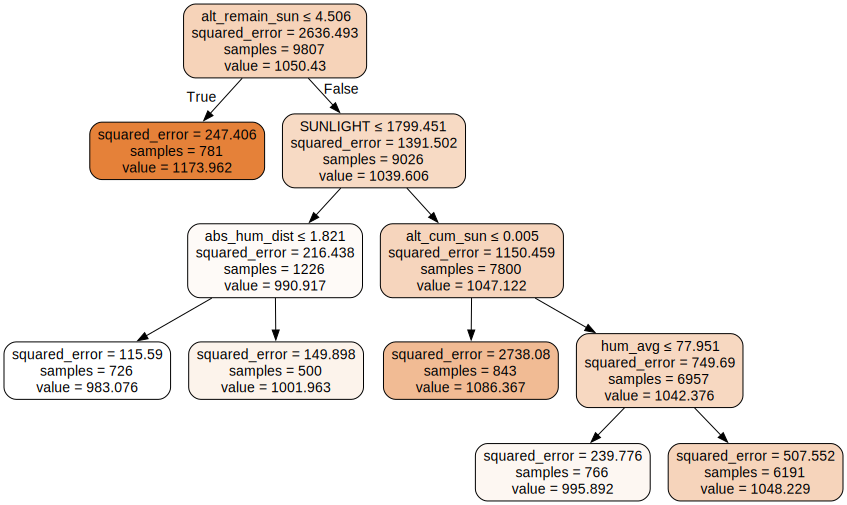

In [13]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train_scaled.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_clean")  # This saves the tree visualization to a file
graph_rf

In [14]:
orchids_cleaned1 = orchids[(orchids['abs_hum_dist'] > 10)].dropna().copy() #  & (orchids['day'] <= 1)
X2 = orchids_cleaned1[features_hl_hum].copy()
y2 = orchids_cleaned1['orchid_shift']
orchids_cleaned1

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,0.0,0.002500,24.995714,7.169697e+08,2479.174171,1.537992,38.24,10.006966,10.006966,0.006966,22180.437817,1.006990,1,1,89.575224,71.66,0.007166,0,1.0,79.458149,9.458149,9.458149,79.772096,9.772096,9.772096,99.823,89478.963448,248.847326,248.847326,0.173226,-0.25,1212.98,1210.63,1214.25,-4.87
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,0.0,0.002500,24.995714,7.169697e+08,2479.218604,1.555047,38.67,10.014150,10.014150,0.014150,22340.355820,1.014251,1,1,89.792181,71.84,0.007184,0,1.0,79.461255,9.461255,9.461255,79.778728,9.778728,9.778728,99.822,89759.181040,249.064699,249.064699,0.351929,0.25,1213.34,1210.37,1213.75,-5.38
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,0.0,0.002500,24.995714,7.169697e+08,2479.264719,1.574507,39.16,10.021350,10.021350,0.021350,22501.786837,1.021580,1,1,89.984084,72.00,0.007200,0,1.0,79.464367,9.464367,9.464367,79.785376,9.785376,9.785376,99.821,90014.784686,249.283015,249.283015,0.531085,-1.00,1213.60,1210.11,1214.25,-4.64
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,0.0,0.002500,24.995714,7.169697e+08,2479.312513,1.591947,39.60,10.028564,10.028564,0.028564,22664.701654,1.028976,1,1,90.150941,72.14,0.007214,0,1.0,79.467484,9.467484,9.467484,79.792041,9.792041,9.792041,99.820,90245.712909,249.502178,249.502178,0.710648,-1.50,1213.82,1209.91,1213.25,-3.34
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,0.0,0.002500,24.995714,7.169697e+08,2479.361982,1.610585,40.07,10.035790,10.035790,0.035790,22829.069936,1.036438,1,1,90.292761,72.26,0.007226,0,1.0,79.470606,9.470606,9.470606,79.798721,9.798721,9.798721,99.819,90451.903948,249.722168,249.722168,0.890568,-1.50,1213.94,1209.76,1212.25,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38264,2,826100,1064.00,1.3,8.0,-4.0,2438.9448,80.093860,3826400,0.0,6.236097,14.309547,1.638919e+04,1427.371925,0.995202,24.27,10.093860,10.093860,0.093860,24194.001270,1.098406,1,1,-255.559760,-204.74,-0.020474,1,-1.0,84.420957,14.420957,14.420957,80.816904,10.816904,10.816904,91.739,-236648.497207,246.183674,246.183674,2.289194,-0.25,1060.72,1063.40,1078.25,-0.60
38265,2,826200,1063.00,1.3,8.0,-4.0,2439.1880,80.073400,3826500,0.0,6.236097,14.309547,1.638919e+04,1427.124955,0.997153,24.32,10.073400,10.073400,0.073400,23704.021588,1.076161,1,1,-255.450293,-204.60,-0.020460,1,-1.0,84.420431,14.420431,14.420431,80.795728,10.795728,10.795728,91.738,-236065.081966,245.709164,245.709164,1.790364,-1.00,1060.83,1063.56,1077.50,0.56
38266,2,826300,1061.50,1.3,8.0,-4.0,2439.4316,80.052970,3826600,0.0,6.236097,14.309547,1.638919e+04,1426.878468,0.998693,24.36,10.052970,10.052970,0.052970,23224.661761,1.054398,1,1,-255.140908,-204.30,-0.020430,1,-1.0,84.419903,14.419903,14.419903,80.774572,10.774572,10.774572,91.737,-235298.423454,245.235327,245.235327,1.292167,-1.50,1060.88,1063.83,1077.00,2.33
38267,2,826400,1062.25,1.3,8.0,-4.0,2439.6755,80.032570,3826700,0.0,6.236097,14.309547,1.638919e+04,1426.632464,0.999823,24.39,10.032570,10.032570,0.032570,22755.678554,1.033106,1,1,-254.831270,-204.00,-0.020400,1,-1.0,84.419372,14.419372,14.419372,80.753437,10.753437,10.753437,91.736,-234533.409154,244.762152,244.762152,0.794602,0.75,1060.99,1064.07,1077.75,1.82


In [15]:
X_train_scaled1 = X2[orchids_cleaned1['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_test_scaled1 = X2[orchids_cleaned1['day'] > 1]# X_test # scaler.transform(X_test) # 
y_train1 = y2[orchids_cleaned1['day'] <= 1]
y_test1 = y2[orchids_cleaned1['day'] > 1]
y_test1

31658    1116.25
31659    1117.75
31660    1116.75
31661    1117.75
31662    1117.25
          ...   
38264    1078.25
38265    1077.50
38266    1077.00
38267    1077.75
38268    1076.50
Name: orchid_shift, Length: 5256, dtype: float64

In [16]:
%%time

# Split the data into training and testing sets
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=39)

# X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
# X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg1 = LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Train the model
lin_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
lin_pred1 = lin_reg1.predict(X_test_scaled1)

# Initialize the Random Forest Regressor
forest_reg1 = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=39)

# Train the model
forest_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
forest_pred1 = forest_reg1.predict(X_test_scaled1)

CPU times: total: 4.3 s
Wall time: 4.32 s


In [17]:
# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

feature_names1 = X_train_scaled1.columns
coefficients1 = lin_reg1.coef_

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

for feature, coef in zip(feature_names1, coefficients1):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg1.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test1, forest_pred1)
forest_mse = mean_squared_error(y_test1, forest_pred1)
forest_mae = mean_absolute_error(y_test1, forest_pred1)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: -4.348476512434557
Linear Regression MSE: 3804.795156121448
Linear Regression MAE: 55.20447855421312
alt_remain_sun: -2.537437038536483
sun_diff: 0.08323116938425058
hum_diff: -0.041697517379981695
hl_hum_ind_v2: 18.5740295920259
alt_hum_dist: 0.6735596946546998
SUNLIGHT: 0.032993857179318076
TRANSPORT_FEES: 52.21314781949706
EXPORT_TARIFF: 3.0439281818875523
IMPORT_TARIFF: -6.558242963541316
Intercept: 962.7240104294797
Random Forest R2: -3.1023623404928937
Random Forest MSE: 2918.335403637691
Random Forest MAE: 44.02523249691476


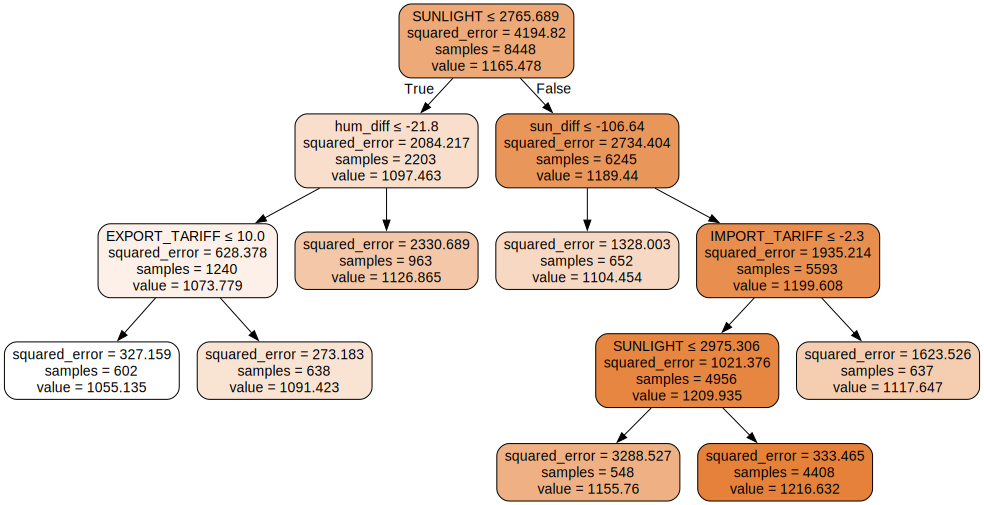

In [18]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator1 = forest_reg1.estimators_[0]

dot_data_rf1 = export_graphviz(estimator1, out_file=None,
                              feature_names=X_train_scaled1.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf1 = graphviz.Source(dot_data_rf1)
graph_rf1.render("random_forest_tree_clean1")  # This saves the tree visualization to a file
graph_rf1

In [19]:
# prices_0.head(50)

In [20]:
print(orchids_cleaned.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  19823.000000   19823.000000  19823.000000    19823.000000   
mean       0.735661  567353.165515   1049.244905        1.134072   
std        0.878414  261813.531846     47.707287        0.289153   
min       -1.000000       0.000000    960.750000        0.700000   
25%        0.000000  410950.000000   1017.750000        0.900000   
50%        1.000000  591000.000000   1044.750000        1.100000   
75%        1.000000  779100.000000   1072.250000        1.300000   
max        2.000000  960100.000000   1215.750000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   19823.000000   19823.000000  19823.000000  19823.000000   
mean        9.456540      -3.854084   2182.061237     72.556707   
std         1.383611       1.351750    763.067475      4.572448   
min         7.500000      -8.000000    343.646400     60.000000   
25%         8.500000      -5.000000   1838.903600   

In [21]:
print(orchids_cleaned1.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  18583.000000   18583.000000  18583.000000    18583.000000   
mean       0.248614  386921.299037   1140.560916        1.325330   
std        1.279803  262408.153699     68.148050        0.270685   
min       -1.000000       0.000000    998.750000        0.800000   
25%       -1.000000  178550.000000   1079.250000        1.200000   
50%        0.000000  301400.000000   1117.250000        1.300000   
75%        2.000000  601400.000000   1209.250000        1.500000   
max        2.000000  960100.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   18583.000000   18583.000000  18583.000000  18583.000000   
mean        9.757224      -3.426820   2959.472229     88.361522   
std         1.597308       1.193028   1130.646075      4.954613   
min         8.000000      -6.000000    382.054750     59.999580   
25%         8.500000      -4.000000   2078.292950   

In [22]:
def apply_model(row):
    if row['abs_hum_dist'] > 10:
        return sum(row[feature_names1] * coefficients1) + lin_reg1.intercept_
    else:
        return 1100 - max(0, (2500 - row['SUNLIGHT']) / row['tte']) + row['tte']

orchids['preds'] = orchids.apply(apply_model, axis=1)
orchids[orchids['abs_hum_dist'] < 10]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl,preds
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,0,25.000000,0.002500,24.995714,7.169697e+08,2500.000000,NaN,NaN,9.000000,9.000000,0.0,8103.083928,1.0,0,1,NaN,NaN,NaN,0,NaN,79.000000,9.000000,9.000000,79.000000,9.000000,9.000000,100.000,NaN,225.000000,225.000000,0.0,NaN,1200.000000,1200.28,1201.00,0.28,1200.000000
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.000000,0.002500,24.995714,7.169697e+08,2499.709850,-2.321200,-58.03,9.004100,9.004100,0.0,8136.374771,1.0,0,1,51.898734,41.00,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1200.875000,1200.06,1202.25,-1.69,1199.993197
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.000000,0.002500,24.995714,7.169697e+08,2499.421800,-2.296533,-57.40,9.008210,9.008210,0.0,8169.884086,1.0,0,1,52.022617,41.10,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1201.166667,1199.84,1203.25,-1.91,1199.986457
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.000000,0.002500,24.995714,7.169697e+08,2499.135850,-2.271849,-56.77,9.012340,9.012340,0.0,8203.695480,1.0,0,1,52.273049,41.30,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1201.312500,1199.66,1205.25,-2.09,1199.979779
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.000000,0.002500,24.995714,7.169697e+08,2498.852000,-2.247148,-56.14,9.016490,9.016490,0.0,8237.811558,1.0,0,1,52.523441,41.50,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1201.400000,1199.44,1203.25,-2.31,1199.973165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,2,999500,1052.00,0.8,8.0,-4.0,2597.2483,69.917725,3999800,25.972483,9.656645,8.445751,4.655250e+01,1523.395503,2.098430,54.49,-0.082275,0.082275,0.0,1.085754,1.0,0,1,232.684696,162.65,-0.016265,0,-0.0,82.195822,12.195822,12.195822,69.404985,-0.595015,0.595015,90.005,1723.067727,-2.136886,2.136886,0.0,0.25,1054.290000,NaN,NaN,NaN,1190.005000
39999,2,999600,1051.00,0.8,8.0,-4.0,2597.7950,69.934050,3999900,25.977950,9.659243,8.441298,4.634565e+01,1523.591291,2.104920,54.67,-0.065950,0.065950,0.0,1.068173,1.0,0,1,233.488718,163.25,-0.016325,0,-0.0,82.194595,12.194595,12.194595,69.419192,-0.580808,0.580808,90.004,1385.933882,-1.713246,1.713246,0.0,-1.00,1054.180000,NaN,NaN,NaN,1190.004000
40000,2,999700,1051.75,0.8,8.0,-4.0,2598.3435,69.950450,4000000,25.983435,9.661841,8.436843,4.613967e+01,1523.787269,2.111406,54.85,-0.049550,0.049550,0.0,1.050798,1.0,0,1,234.506653,164.00,-0.016400,0,-0.0,82.193370,12.193370,12.193370,69.433459,-0.566541,0.566541,90.003,1045.817279,-1.287479,1.287479,0.0,0.75,1054.150000,NaN,NaN,NaN,1190.003000
40001,2,999800,1052.50,0.8,8.0,-4.0,2598.8938,69.966900,4000100,25.988938,9.664440,8.432388,4.593456e+01,1523.983439,2.117888,55.03,-0.033100,0.033100,0.0,1.033654,1.0,0,1,235.166464,164.50,-0.016450,0,-0.0,82.192148,12.192148,12.192148,69.447787,-0.552213,0.552213,90.002,700.576465,-0.860234,0.860234,0.0,0.75,1054.070000,NaN,NaN,NaN,1190.002000


In [23]:
orchids['preds'].max()

1272.9668105688438

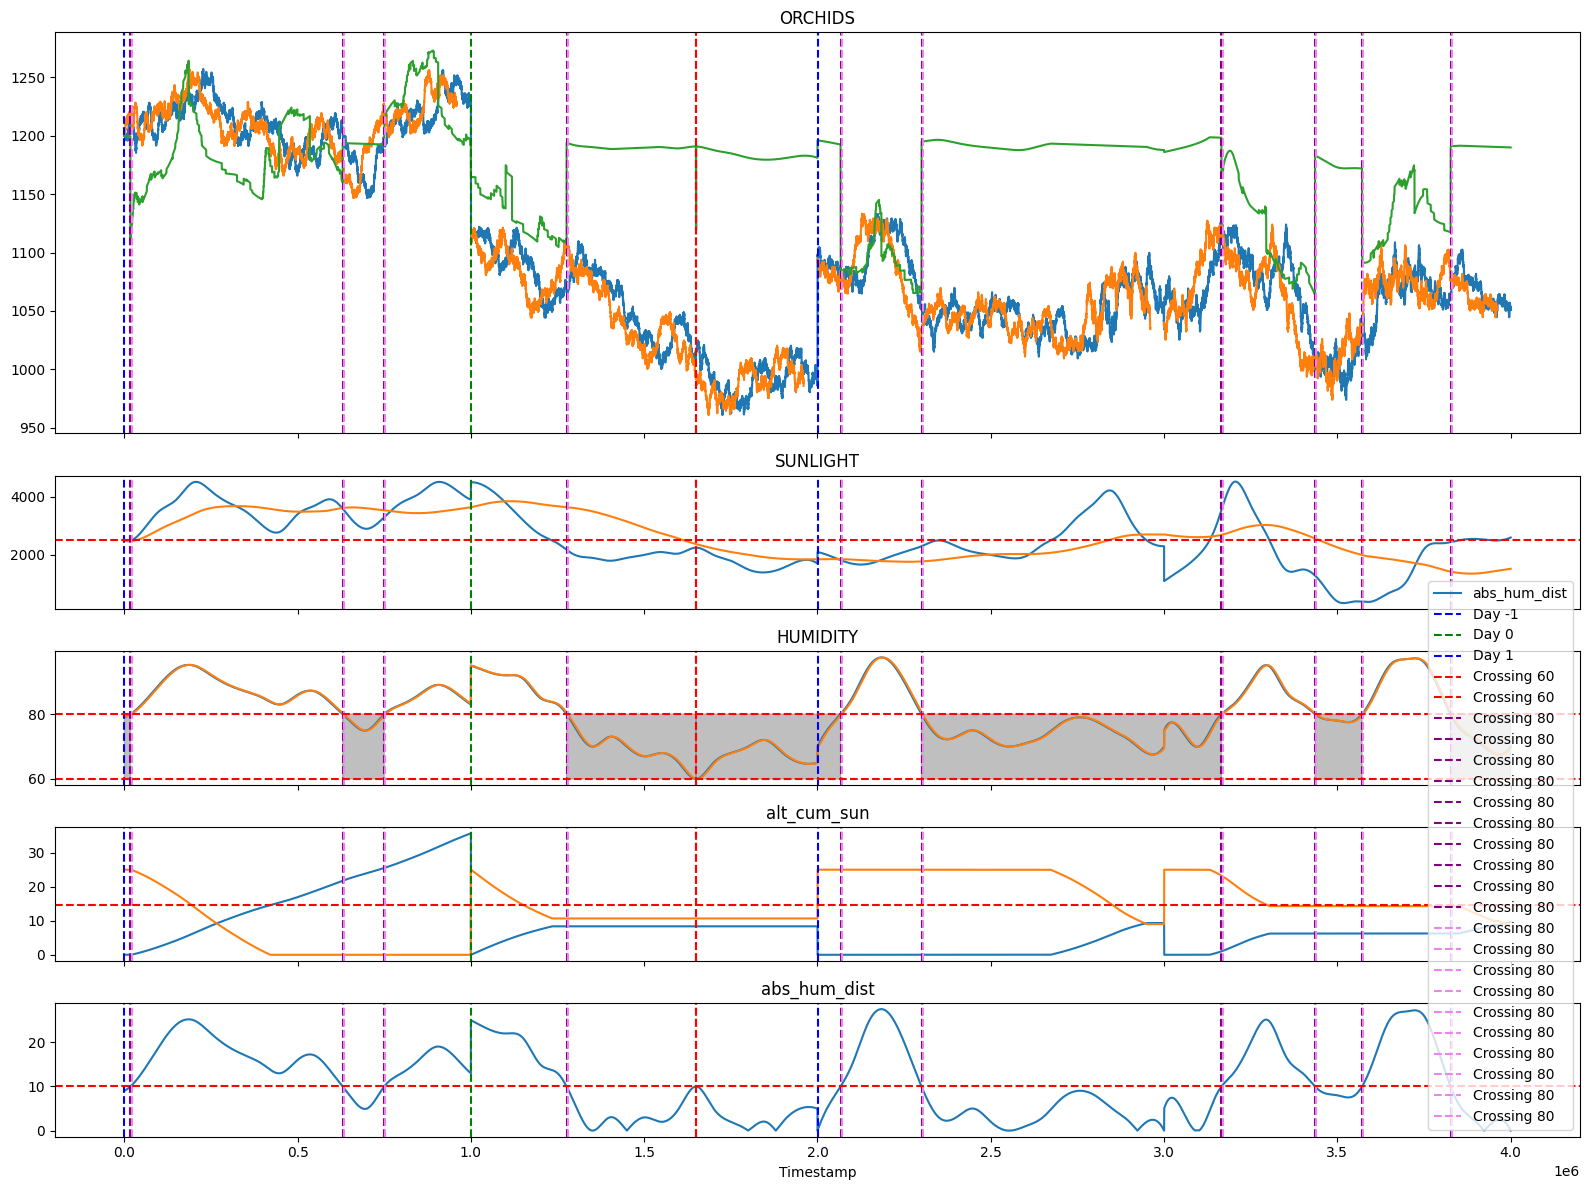

In [24]:
def plot_orchids_sunlight_humidity2(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].plot(df['new_timestamp'], df['preds'], label='preds')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity2(orchids)